In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load("mnist_train_small.npy")

In [3]:
data   #in this data the 0th column-index in every row is the number and the rest columns in a row are the flattened features. 

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
data.shape   #so we have 1 y and 784 features , so size of an image = 28*28 pixels. And there are 19999 images like this.

(19999, 785)

In [5]:
X = data[:, 1:]  #all rows and all columns except the 0th column
y = data[:, 0]   #all rows and only 0th column.

In [6]:
X.shape , y.shape

((19999, 784), (19999,))

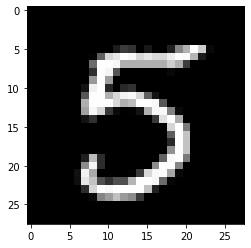

In [7]:
#looking at one of the images
plt.imshow(X[0].reshape(28, 28), cmap = "gray")

# Inbuilt KNN

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
X_train.shape, y_train.shape

((13399, 784), (13399,))

In [11]:
X_test.shape, y_test.shape

((6600, 784), (6600,))

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [13]:
#training the model, plotting points on the graph
model.fit(X_train, y_train)

KNeighborsClassifier()

### In KNN , no work is done in training, all work and all computaions are done at the time of testing.

In [14]:
predictions = model.predict(X_test[:100])   

In [15]:
predictions

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2, 0, 6, 1, 9, 9, 4, 9, 1, 6, 2, 7, 9,
       9, 2, 4, 4, 5, 6, 0, 5, 9, 0, 8, 7, 9, 0, 2, 3, 8, 8, 3, 7, 0, 9,
       8, 2, 7, 3, 7, 9, 1, 9, 8, 3, 9, 3, 2, 1, 0, 4, 5, 4, 9, 3, 6, 6,
       0, 9, 7, 0, 6, 0, 3, 2, 3, 4, 9, 5, 5, 4, 1, 6, 0, 2, 6, 0, 5, 3,
       3, 1, 8, 0, 6, 9, 5, 9, 2, 0, 3, 1], dtype=uint8)

In [16]:
y_test[:100]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2, 0, 6, 1, 9, 9, 4, 9, 1, 6, 2, 7, 9,
       4, 2, 4, 4, 5, 6, 0, 8, 9, 0, 8, 7, 9, 0, 2, 3, 8, 8, 3, 7, 0, 9,
       8, 2, 7, 3, 7, 9, 1, 9, 8, 3, 9, 3, 2, 1, 0, 4, 5, 4, 9, 3, 6, 2,
       0, 9, 7, 0, 6, 0, 3, 2, 3, 4, 9, 5, 5, 4, 1, 6, 0, 2, 6, 0, 5, 8,
       3, 1, 8, 0, 6, 9, 5, 9, 2, 0, 3, 1], dtype=uint8)

In [17]:
model.score(X_test[:100], y_test[:100])

0.95

# Custom KNN - Our own model from scratch

In [19]:
class CustomKNN:
    
    #constructor
    def __init__(self, n_neighbors = 5):   
        self.n_neighbors = n_neighbors    #by default, n_neighbors = 5
        
    #training function - It only says that X and y are the training points.
    def fit(self, X, y):
        #self._X = X.astype(np.int64)    #We used the astype so as to convert the values into integer which is a large int and so we are able to store the large values her(784 dimensions).
        #Instead of above we can use standardisation of X:
        self._X = (X - X.mean()) / X.std()   #In standardisation, mean = 0  and standard dev = 1.
        self._y = y    #both of these are private so that these cant be accessed from outside.
    
    #predict_point func - this predicts the class for a single point.
    def predict_point(self, point):
        list_distances  = []   #stores the distances of the given point from all the training points in each class.
        
        for x_point, y_point in zip(self._X, self._y):
            #to calculate distances we dont find the square root as at the end we just need to compare all the values.
            dist_point = ((point - x_point)**2).sum()
            list_distances.append([dist_point, y_point])  #we are appending array(consists of distance and class for a point) inside the distances array.
            
        #sorting the array on the basis of distance which is present at the index 0.
        sorted_dist = sorted(list_distances)
        
        #taking top k= n_neighbors values(0th index) out of the sorted list
        top_k = sorted_dist[:self.n_neighbors]  
        
        #Now we try to get the most frequent class among these top_k classes
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts = True)
        ans = items[np.argmax(counts)]
        
        return ans
    
    #predict - gives the answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std()
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype = int)  #to get integer values
    
    #score - to measure the accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [20]:
knn = CustomKNN()

In [21]:
knn.fit(X_train , y_train)

In [22]:
knn.predict(X_test[: 10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [23]:
y_test[: 10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [24]:
knn.score(X_test[:100], y_test[:100])

0.95

# Demo of above CustomKNN function

In [25]:
#zip 
x = [1, 2, 3, 4]
y = [11, 12, 13, 14]
list(zip(x, y))  #zip combines the corresponding values

[(1, 11), (2, 12), (3, 13), (4, 14)]

In [26]:
#sorted
li = [
    [23, 0],
    [11, 1],
    [14, 1],
    [22, 0],
    [100, 0],
    [78, 0]
]
print(sorted(li)) #this gives the sorted list on the basis of index=0
print(sorted(li, key = lambda x : x[1]))   #this gives the sorted list on the basis of x[1] ie first index of x.

[[11, 1], [14, 1], [22, 0], [23, 0], [78, 0], [100, 0]]
[[23, 0], [22, 0], [100, 0], [78, 0], [11, 1], [14, 1]]


In [27]:
#to get top k=4(say) class and its count using unique
topK = sorted(li[:4])
print(np.unique(np.array(topK)[:, 1])) #this gives only the unique values present in topK[:, 1]
items, counts = np.unique(np.array(topK)[:, 1], return_counts = True)   #to get the freq also along with classes

[0 1]


In [28]:
items, counts  #items are the unique classes present in topK values and counts are the freq of occurrences of these unique classes.

(array([0, 1]), array([2, 2], dtype=int64))

In [29]:
#argmax
np.argmax(counts)  #this returns the index of the max values in the counts array.Here 0 is the index

0

In [30]:
items[np.argmax(counts)]  #this returns the value of items array at index of the max values in the counts array. Here 0 is the class.

0

### KNN is a bruteforce algorithm. It finds the distance for all points and takes more time.It sis not an optimised algrithm. No work is done during Training , all work is done during Testing.